<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/Hierarchical%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

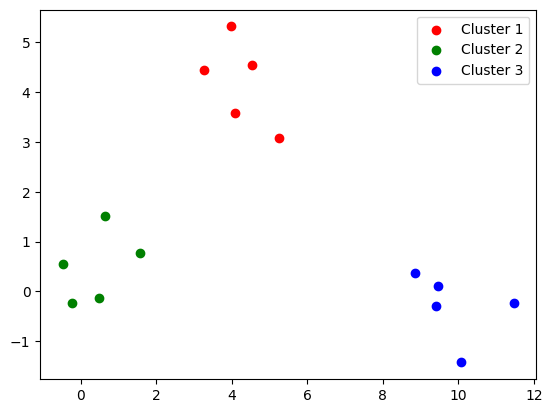

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Step 2: Compute full distance matrix between clusters
def compute_distance_matrix(clusters):
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)  # initialize with infinity

    for i in range(n):
        for j in range(i + 1, n):
            # Single linkage (minimum distance between points in the two clusters)
            dist = np.min([euclidean_distance(p1, p2)
                           for p1 in clusters[i] for p2 in clusters[j]])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist

    return dist_matrix

# Step 3: Agglomerative clustering function
def agglomerative_clustering(data, n_clusters):
    # Initialize each point as its own cluster
    clusters = [[point] for point in data]

    while len(clusters) > n_clusters:
        dist_matrix = compute_distance_matrix(clusters)

        # Find the two closest clusters
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)

        # Merge clusters i and j
        new_cluster = clusters[i] + clusters[j]

        # Remove old clusters and add the merged one
        clusters.pop(max(i, j))  # pop larger index first
        clusters.pop(min(i, j))
        clusters.append(new_cluster)

    return clusters

# Step 4: Visualization function
def plot_clusters(clusters):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for idx, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1],
                    color=colors[idx % len(colors)], label=f'Cluster {idx+1}')

    plt.legend()
    plt.show()


# ---- Example Run ----
# Generate sample data
np.random.seed(42)
data = np.vstack([
    np.random.randn(5, 2) + np.array([0, 0]),
    np.random.randn(5, 2) + np.array([5, 5]),
    np.random.randn(5, 2) + np.array([10, 0])
])

# Apply clustering
clusters = agglomerative_clustering(data, n_clusters=3)

# Plot results
plot_clusters(clusters)

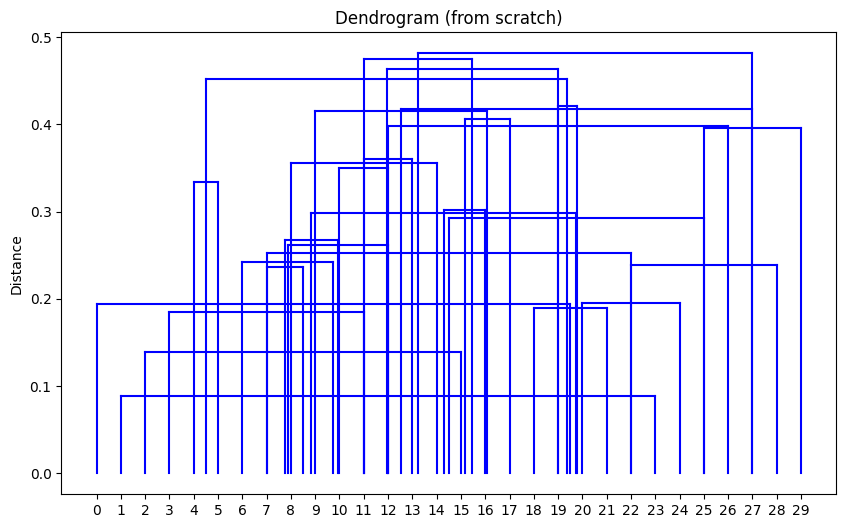

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# -----------------------------
# Step 1: Euclidean distance
# -----------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# -----------------------------
# Step 2: Distance matrix (single linkage)
# -----------------------------
def compute_distance_matrix(clusters):
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)

    for i in range(n):
        for j in range(i + 1, n):
            dist = np.min([euclidean_distance(p1, p2)
                           for p1 in clusters[i] for p2 in clusters[j]])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

# -----------------------------
# Step 3: Agglomerative clustering with merge history
# -----------------------------
def agglomerative_clustering(data):
    clusters = [[point] for point in data]
    cluster_ids = list(range(len(data)))  # unique ID for each cluster
    next_id = len(data)

    merge_history = []  # store merges for dendrogram

    while len(clusters) > 1:
        dist_matrix = compute_distance_matrix(clusters)
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
        dist = dist_matrix[i, j]

        # record merge (cluster1, cluster2, distance)
        merge_history.append([cluster_ids[i], cluster_ids[j], dist])

        # merge clusters
        new_cluster = clusters[i] + clusters[j]

        # remove old clusters
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))
        cluster_ids.pop(max(i, j))
        cluster_ids.pop(min(i, j))

        # add merged cluster
        clusters.append(new_cluster)
        cluster_ids.append(next_id)
        next_id += 1

    return merge_history

# -----------------------------
# Step 4: Dendrogram plotting from scratch
# -----------------------------
def plot_dendrogram(merge_history, labels):
    """
    merge_history: [[cluster1, cluster2, distance], ...]
    labels: list of original point labels (0..n-1)
    """
    # position of each leaf along x-axis
    pos = {i: i for i in labels}
    fig, ax = plt.subplots(figsize=(10, 6))

    for merge in merge_history:
        c1, c2, dist = merge
        x1, x2 = pos[c1], pos[c2]
        y = dist

        # plot vertical lines from children to parent
        ax.plot([x1, x1], [0, y], c='b')
        ax.plot([x2, x2], [0, y], c='b')
        # plot horizontal line connecting clusters
        ax.plot([x1, x2], [y, y], c='b')

        # assign new position for merged cluster (midpoint)
        new_id = max(pos.keys()) + 1
        pos[new_id] = (x1 + x2) / 2
        # remove merged clusters and add new
        del pos[c1]
        del pos[c2]
        pos[new_id] = (x1 + x2) / 2

    ax.set_ylabel("Distance")
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_title("Dendrogram (from scratch)")
    plt.show()

# -----------------------------
# Step 5: Example with concentric circles
# -----------------------------
np.random.seed(42)
data, _ = make_circles(n_samples=30, noise=0.05, factor=0.5)

# perform clustering
merge_history = agglomerative_clustering(data)

# plot dendrogram
plot_dendrogram(merge_history, labels=list(range(len(data))))


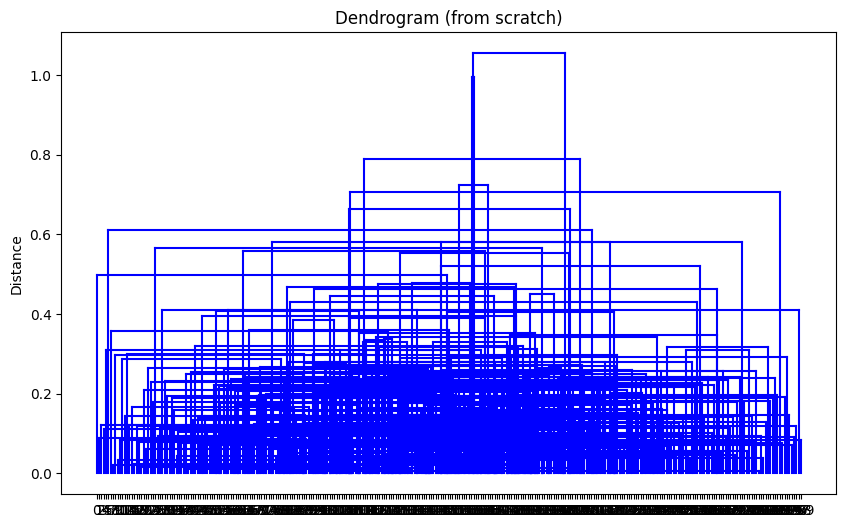

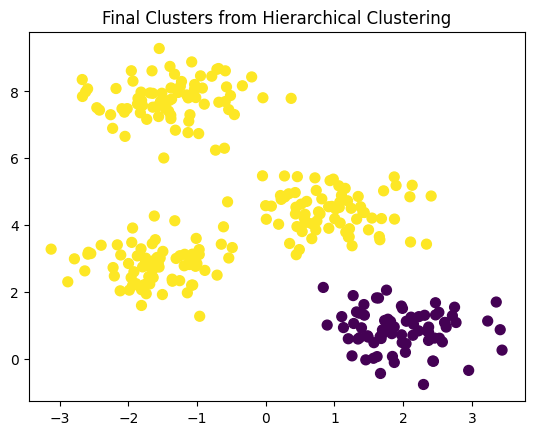

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

# -----------------------------
# Step 1: Euclidean distance
# -----------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# -----------------------------
# Step 2: Distance matrix (single linkage)
# -----------------------------
def compute_distance_matrix(clusters):
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.min([euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

# -----------------------------
# Step 3: Agglomerative clustering with merge history
# -----------------------------
def agglomerative_clustering(data):
    clusters = [[point] for point in data]
    cluster_ids = list(range(len(data)))
    next_id = len(data)
    merge_history = []

    while len(clusters) > 1:
        dist_matrix = compute_distance_matrix(clusters)
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
        dist = dist_matrix[i, j]
        merge_history.append([cluster_ids[i], cluster_ids[j], dist])
        new_cluster = clusters[i] + clusters[j]

        clusters.pop(max(i, j))
        clusters.pop(min(i, j))
        cluster_ids.pop(max(i, j))
        cluster_ids.pop(min(i, j))

        clusters.append(new_cluster)
        cluster_ids.append(next_id)
        next_id += 1

    return merge_history

# -----------------------------
# Step 4: Dendrogram plotting from scratch
# -----------------------------
def plot_dendrogram(merge_history, labels):
    pos = {i: i for i in labels}
    fig, ax = plt.subplots(figsize=(10, 6))

    for merge in merge_history:
        c1, c2, dist = merge
        x1, x2 = pos[c1], pos[c2]
        y = dist
        ax.plot([x1, x1], [0, y], c='b')
        ax.plot([x2, x2], [0, y], c='b')
        ax.plot([x1, x2], [y, y], c='b')
        new_id = max(pos.keys()) + 1
        pos[new_id] = (x1 + x2) / 2
        del pos[c1]
        del pos[c2]

    ax.set_ylabel("Distance")
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_title("Dendrogram (from scratch)")
    plt.show()

# -----------------------------
# Step 5: Assign clusters by cutting dendrogram
# -----------------------------
def assign_clusters(merge_history, n_clusters, n_samples):
    # Initially each point is its own cluster
    cluster_map = {i: i for i in range(n_samples)}
    current_cluster_id = n_samples

    for merge in merge_history:
        c1, c2, _ = merge
        # Merge only if resulting clusters exceed desired number
        clusters_remaining = len(set(cluster_map.values()))
        if clusters_remaining <= n_clusters:
            break
        # Merge clusters
        for key in cluster_map:
            if cluster_map[key] == c1 or cluster_map[key] == c2:
                cluster_map[key] = current_cluster_id
        current_cluster_id += 1

    # Map final cluster IDs to 0..n_clusters-1
    unique_ids = list(sorted(set(cluster_map.values())))
    labels = np.array([unique_ids.index(cluster_map[i]) for i in range(n_samples)])
    return labels

# -----------------------------
# Step 6: Plot clusters
# -----------------------------
def plot_clusters(data, labels, title="Clusters"):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50)
    plt.title(title)
    plt.show()

# -----------------------------
# Step 7: Example with concentric circles
# -----------------------------
np.random.seed(42)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Hierarchical clustering
merge_history = agglomerative_clustering(data)

# Plot dendrogram
plot_dendrogram(merge_history, labels=list(range(len(data))))

# Assign clusters by cutting dendrogram at 2 clusters
labels = assign_clusters(merge_history, n_clusters=2, n_samples=len(data))

# Plot final clusters
plot_clusters(data, labels, title="Final Clusters from Hierarchical Clustering")


Generating blob dataset...

=== Blobs Dataset ===
Data shape: (100, 2)
Running hierarchical clustering...


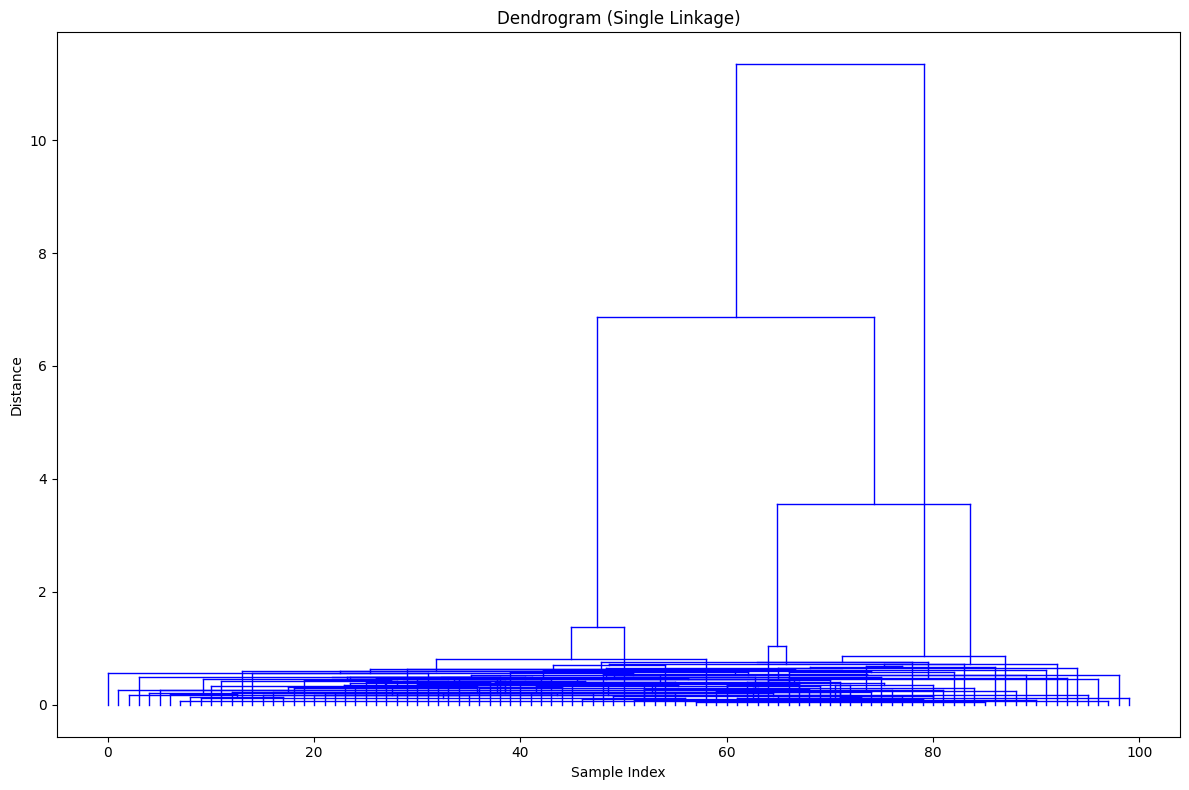

Final clusters: [25 25 25 25]


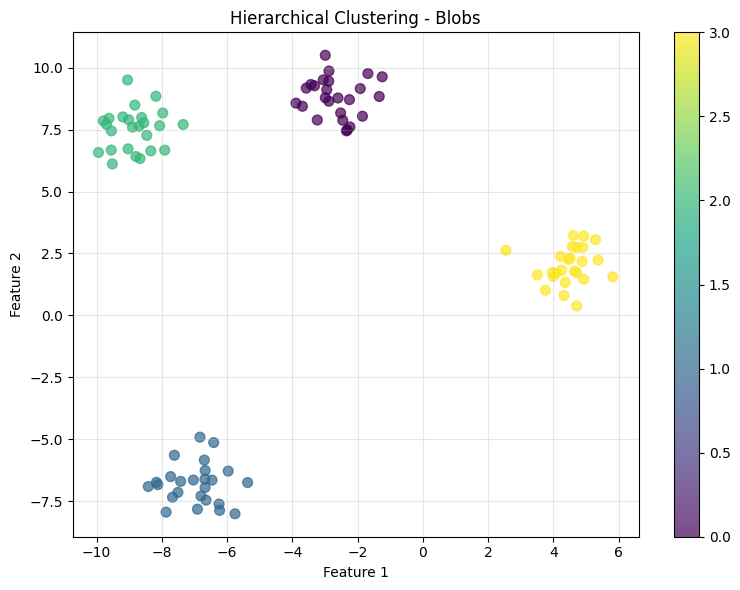


Generating circles dataset...

=== Circles Dataset ===
Data shape: (100, 2)
Running hierarchical clustering...


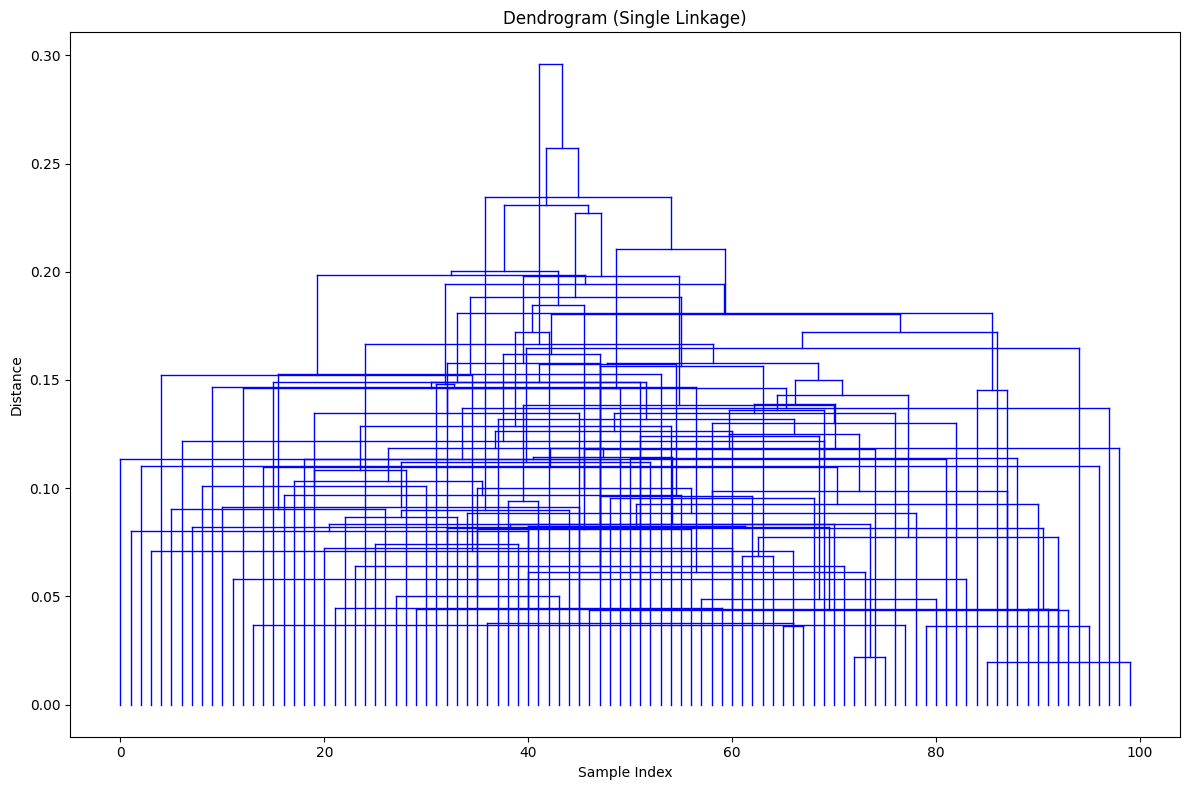

Final clusters: [50 50]


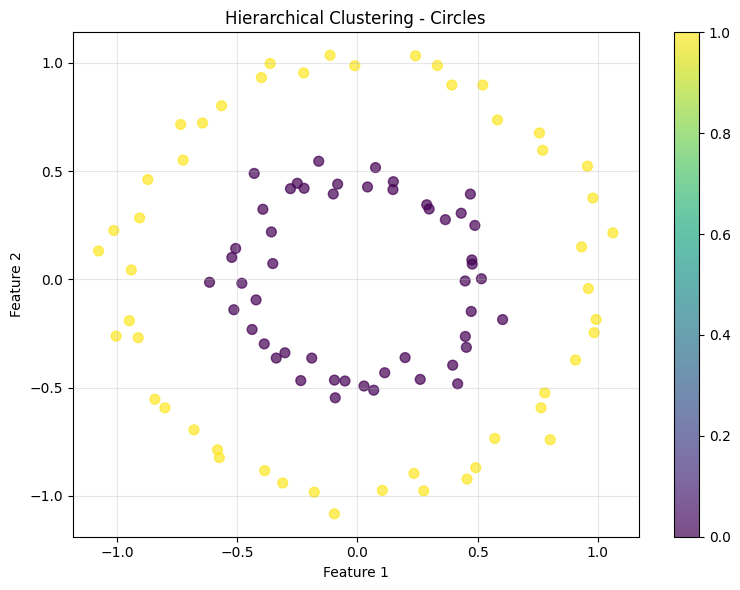


Generating small dataset for dendrogram...

=== Small Blobs Dataset ===
Data shape: (20, 2)
Running hierarchical clustering...


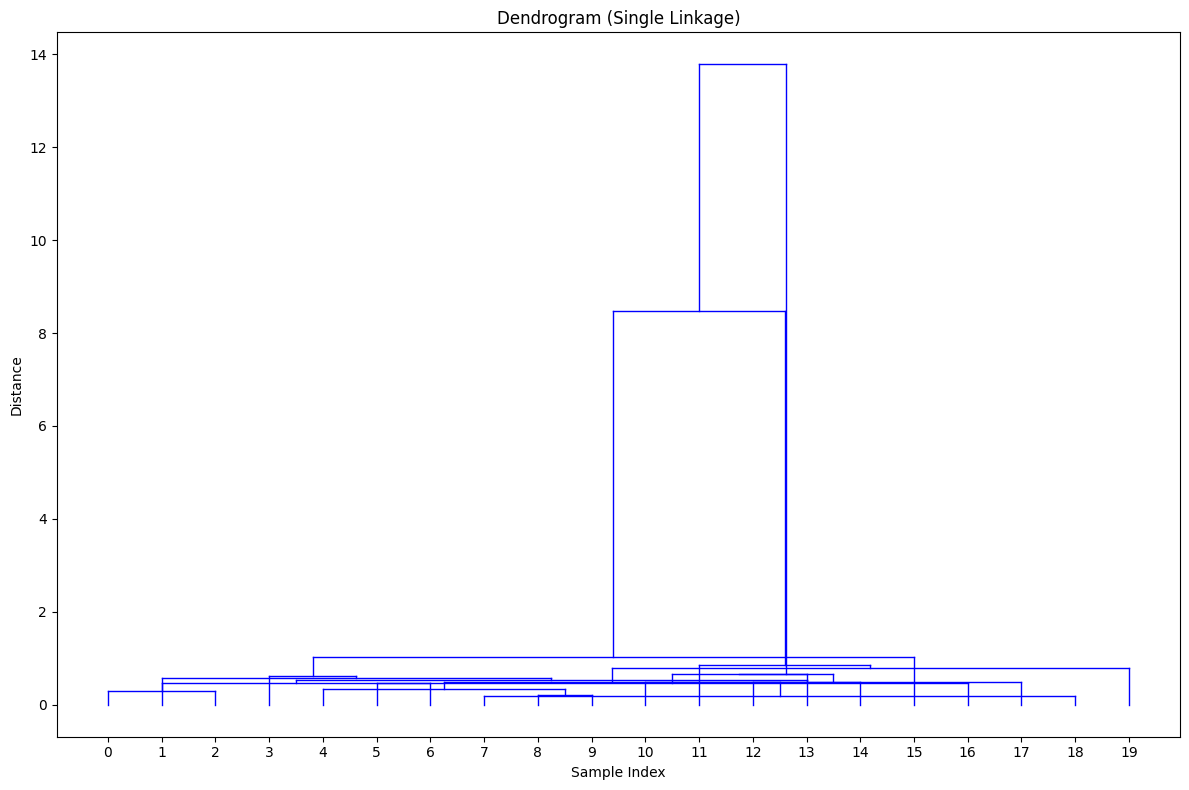

Final clusters: [6 7 7]


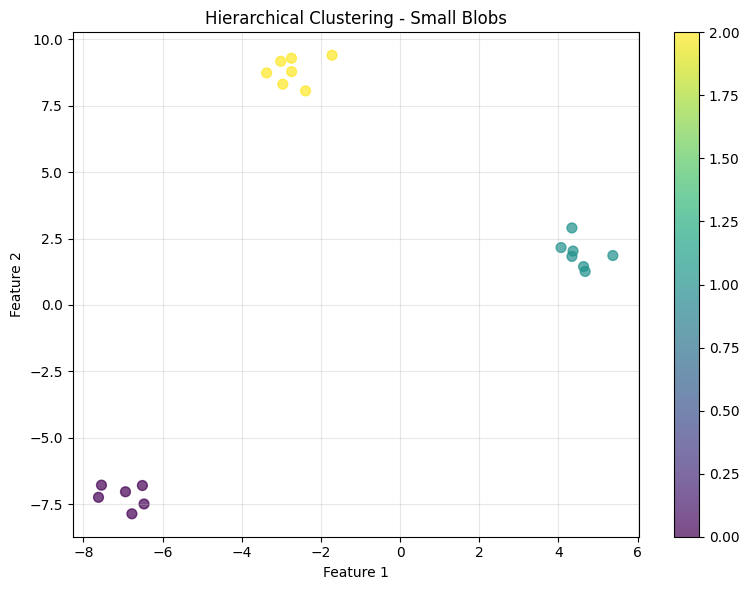

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

# -----------------------------
# Step 1: Euclidean distance
# -----------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# -----------------------------
# Step 2: Distance matrix (single linkage)
# -----------------------------
def compute_distance_matrix(clusters, data):
    """Compute distance matrix between clusters using their indices"""
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)

    for i in range(n):
        for j in range(i + 1, n):
            # Find minimum distance between any two points in different clusters
            min_dist = float('inf')
            for idx1 in clusters[i]:
                for idx2 in clusters[j]:
                    dist = euclidean_distance(data[idx1], data[idx2])
                    min_dist = min(min_dist, dist)

            dist_matrix[i, j] = min_dist
            dist_matrix[j, i] = min_dist

    return dist_matrix

# -----------------------------
# Step 3: Agglomerative clustering with merge history
# -----------------------------
def agglomerative_clustering(data):
    n_samples = len(data)
    # Each cluster initially contains indices of points, not the points themselves
    clusters = [[i] for i in range(n_samples)]
    cluster_ids = list(range(n_samples))
    next_id = n_samples
    merge_history = []

    while len(clusters) > 1:
        # Compute distance matrix using point indices
        dist_matrix = compute_distance_matrix(clusters, data)

        # Find the pair of clusters with minimum distance
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
        dist = dist_matrix[i, j]

        # Record the merge
        merge_history.append([cluster_ids[i], cluster_ids[j], dist])

        # Merge clusters (combine the point indices)
        new_cluster = clusters[i] + clusters[j]

        # Remove old clusters (remove higher index first to avoid index shift issues)
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))
        cluster_ids.pop(max(i, j))
        cluster_ids.pop(min(i, j))

        # Add new merged cluster
        clusters.append(new_cluster)
        cluster_ids.append(next_id)
        next_id += 1

    return merge_history

# -----------------------------
# Step 4: Dendrogram plotting from scratch
# -----------------------------
def plot_dendrogram(merge_history, n_samples):
    """Plot dendrogram using merge history"""
    # Initialize positions for leaf nodes (original data points)
    pos = {i: i for i in range(n_samples)}
    heights = {i: 0 for i in range(n_samples)}  # Track height of each node

    fig, ax = plt.subplots(figsize=(12, 8))

    next_id = n_samples

    for merge in merge_history:
        c1, c2, dist = merge

        # Get positions and current heights
        x1, x2 = pos[c1], pos[c2]
        h1, h2 = heights.get(c1, 0), heights.get(c2, 0)

        # Draw vertical lines from current height to merge height
        ax.plot([x1, x1], [h1, dist], 'b-', linewidth=1)
        ax.plot([x2, x2], [h2, dist], 'b-', linewidth=1)

        # Draw horizontal line connecting the two clusters
        ax.plot([x1, x2], [dist, dist], 'b-', linewidth=1)

        # Update position and height for new merged cluster
        new_pos = (x1 + x2) / 2
        pos[next_id] = new_pos
        heights[next_id] = dist

        # Clean up old positions
        if c1 in pos:
            del pos[c1]
        if c2 in pos:
            del pos[c2]
        if c1 in heights:
            del heights[c1]
        if c2 in heights:
            del heights[c2]

        next_id += 1

    ax.set_ylabel("Distance")
    ax.set_xlabel("Sample Index")
    ax.set_title("Dendrogram (Single Linkage)")

    # Set x-axis ticks to show sample indices
    if n_samples <= 50:  # Only show ticks if not too many samples
        ax.set_xticks(range(n_samples))

    plt.tight_layout()
    plt.show()

# -----------------------------
# Step 5: Assign clusters by cutting dendrogram
# -----------------------------
def assign_clusters(merge_history, n_clusters, n_samples):
    """Assign final cluster labels by cutting the dendrogram"""
    if n_clusters >= n_samples:
        return np.arange(n_samples)

    # Build cluster membership through the merge process
    # Start with each point in its own cluster
    clusters = {i: {i} for i in range(n_samples)}
    next_cluster_id = n_samples

    # Apply merges until we have the desired number of clusters
    merges_to_apply = n_samples - n_clusters

    for i, (c1, c2, dist) in enumerate(merge_history):
        if i >= merges_to_apply:
            break

        # Merge the two clusters
        merged_points = clusters[c1] | clusters[c2]
        clusters[next_cluster_id] = merged_points

        # Remove old clusters
        del clusters[c1]
        del clusters[c2]

        next_cluster_id += 1

    # Create final labels array
    labels = np.zeros(n_samples, dtype=int)
    for cluster_id, (cluster_label, point_set) in enumerate(clusters.items()):
        for point_idx in point_set:
            labels[point_idx] = cluster_id

    return labels

# -----------------------------
# Step 6: Plot clusters
# -----------------------------
def plot_clusters(data, labels, title="Clusters"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Step 7: Example with different datasets
# -----------------------------
def run_clustering_example(data, dataset_name, n_clusters=2):
    """Run hierarchical clustering on a dataset and display results"""
    print(f"\n=== {dataset_name} Dataset ===")
    print(f"Data shape: {data.shape}")

    # Hierarchical clustering
    print("Running hierarchical clustering...")
    merge_history = agglomerative_clustering(data)

    # Plot dendrogram (only for smaller datasets)
    if len(data) <= 100:
        plot_dendrogram(merge_history, n_samples=len(data))
    else:
        print("Skipping dendrogram plot (too many samples)")

    # Assign clusters by cutting dendrogram
    labels = assign_clusters(merge_history, n_clusters=n_clusters, n_samples=len(data))
    print(f"Final clusters: {np.bincount(labels)}")

    # Plot final clusters
    plot_clusters(data, labels, title=f"Hierarchical Clustering - {dataset_name}")

    return labels, merge_history

# -----------------------------
# Examples with different datasets
# -----------------------------
np.random.seed(42)

# Example 1: Blobs (well-separated clusters)
print("Generating blob dataset...")
data_blobs, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.8, random_state=42)
labels_blobs, history_blobs = run_clustering_example(data_blobs, "Blobs", n_clusters=4)

# Example 2: Circles (non-linearly separable)
print("\nGenerating circles dataset...")
data_circles, _ = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=42)
labels_circles, history_circles = run_clustering_example(data_circles, "Circles", n_clusters=2)

# Example 3: Smaller dataset for dendrogram visualization
print("\nGenerating small dataset for dendrogram...")
data_small, _ = make_blobs(n_samples=20, centers=3, cluster_std=0.5, random_state=42)
labels_small, history_small = run_clustering_example(data_small, "Small Blobs", n_clusters=3)

=== Concentric Circles Dataset ===
Running hierarchical clustering on circles...

=== Two Moons Dataset ===


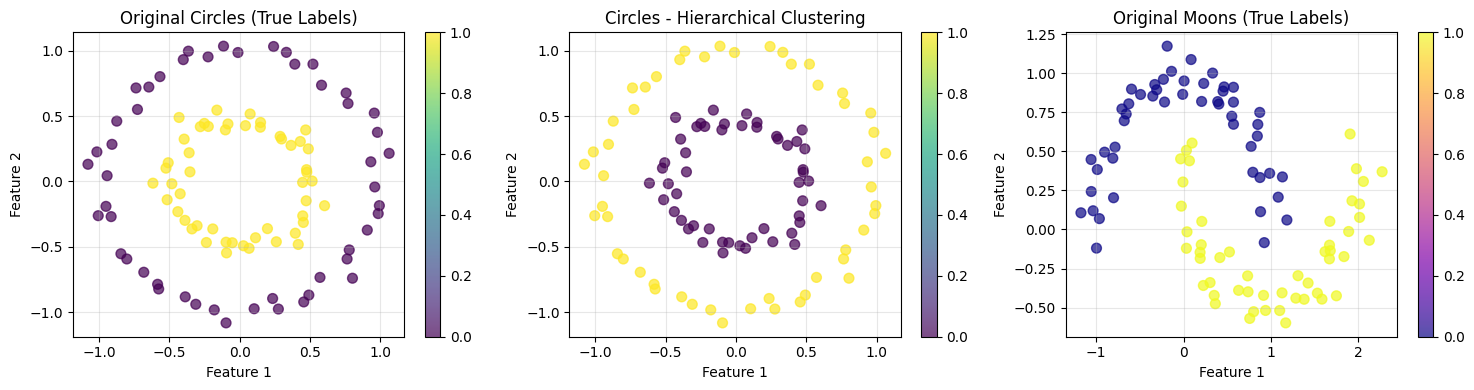

Running hierarchical clustering on moons...

=== Dendrogram Analysis ===
Generating smaller datasets for dendrogram visualization...


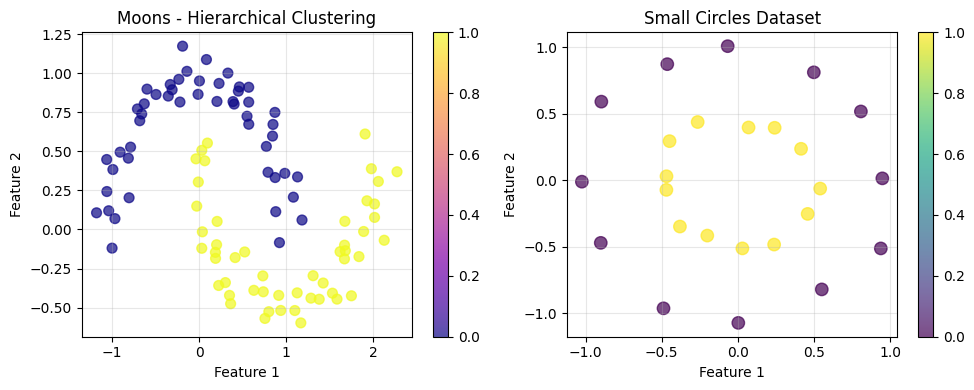

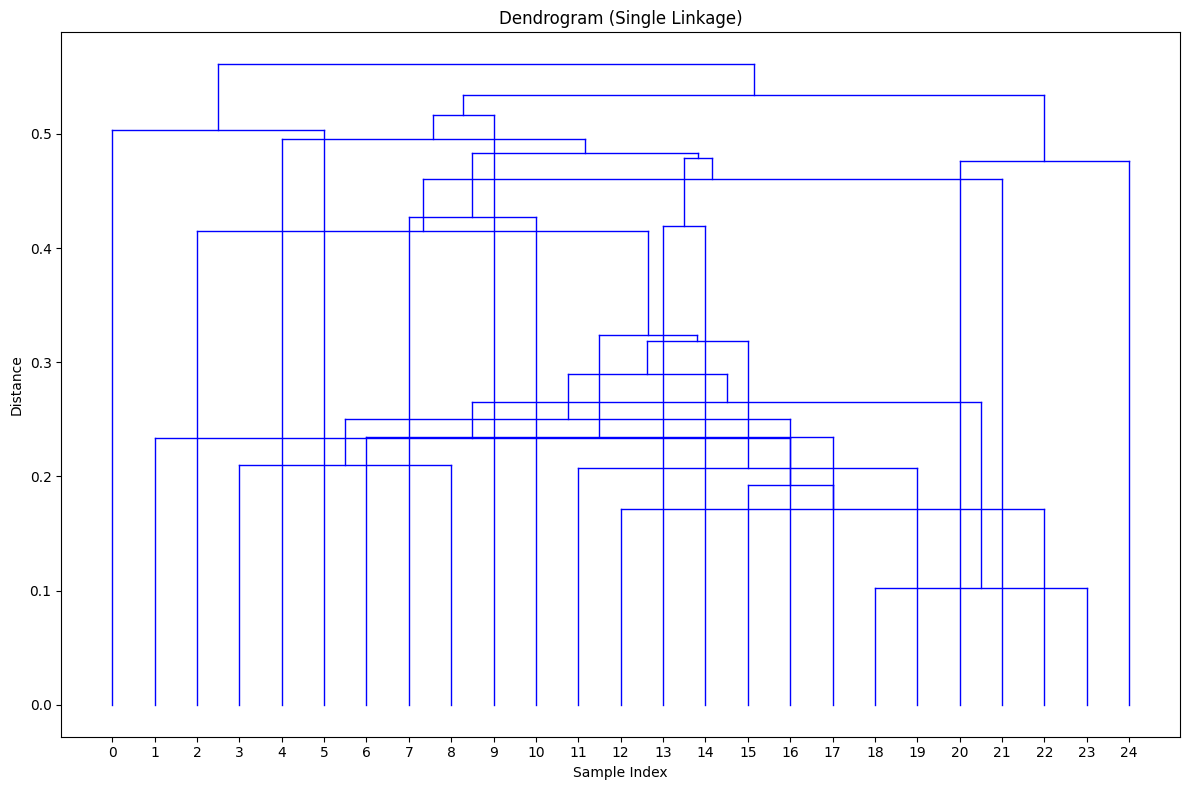

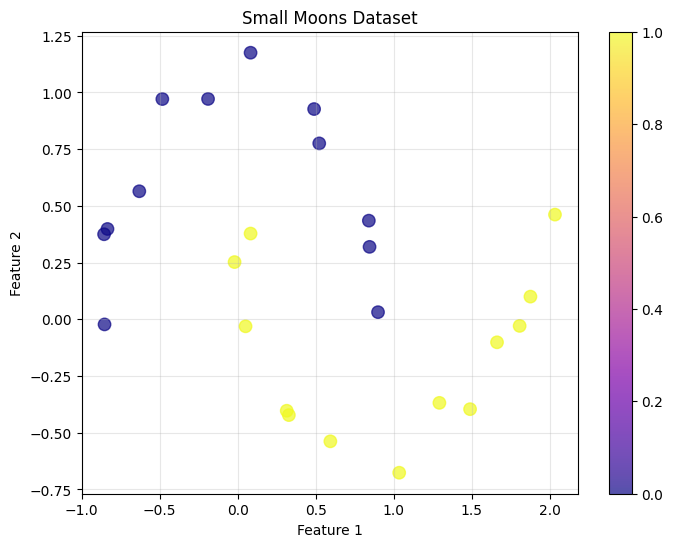

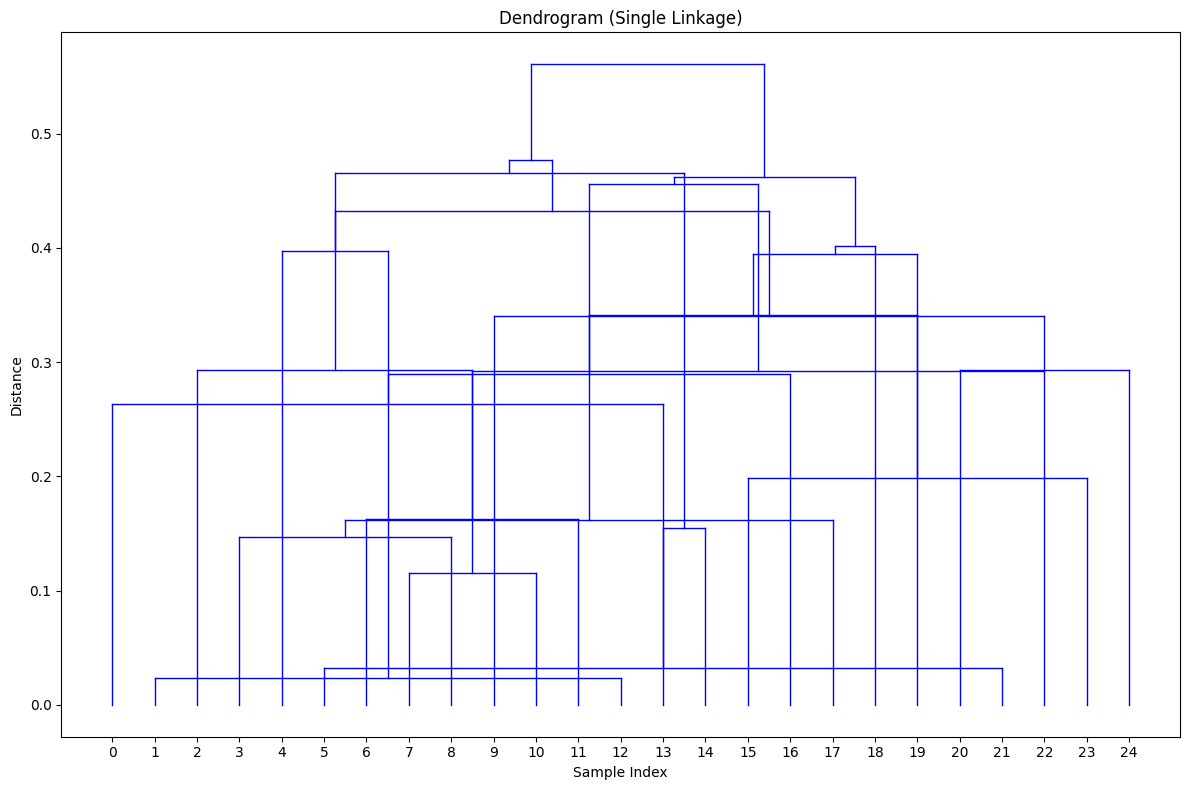


=== Performance Analysis ===
Circles Dataset:
  True labels distribution: [50 50]
  Predicted labels distribution: [50 50]
  Best clustering accuracy: 1.000

Moons Dataset:
  True labels distribution: [50 50]
  Predicted labels distribution: [50 50]
  Best clustering accuracy: 1.000

=== Summary ===
Hierarchical clustering with single linkage:
- Works reasonably well on linearly separable data
- Struggles with non-convex shapes like circles and moons
- Circles accuracy: 1.000
- Moons accuracy: 1.000
- Consider spectral clustering or DBSCAN for non-convex clusters


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

# -----------------------------
# Step 1: Euclidean distance
# -----------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# -----------------------------
# Step 2: Distance matrix (single linkage)
# -----------------------------
def compute_distance_matrix(clusters, data):
    """Compute distance matrix between clusters using their indices"""
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)

    for i in range(n):
        for j in range(i + 1, n):
            # Find minimum distance between any two points in different clusters
            min_dist = float('inf')
            for idx1 in clusters[i]:
                for idx2 in clusters[j]:
                    dist = euclidean_distance(data[idx1], data[idx2])
                    min_dist = min(min_dist, dist)

            dist_matrix[i, j] = min_dist
            dist_matrix[j, i] = min_dist

    return dist_matrix

# -----------------------------
# Step 3: Agglomerative clustering with merge history
# -----------------------------
def agglomerative_clustering(data):
    n_samples = len(data)
    # Each cluster initially contains indices of points, not the points themselves
    clusters = [[i] for i in range(n_samples)]
    cluster_ids = list(range(n_samples))
    next_id = n_samples
    merge_history = []

    while len(clusters) > 1:
        # Compute distance matrix using point indices
        dist_matrix = compute_distance_matrix(clusters, data)

        # Find the pair of clusters with minimum distance
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
        dist = dist_matrix[i, j]

        # Record the merge
        merge_history.append([cluster_ids[i], cluster_ids[j], dist])

        # Merge clusters (combine the point indices)
        new_cluster = clusters[i] + clusters[j]

        # Remove old clusters (remove higher index first to avoid index shift issues)
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))
        cluster_ids.pop(max(i, j))
        cluster_ids.pop(min(i, j))

        # Add new merged cluster
        clusters.append(new_cluster)
        cluster_ids.append(next_id)
        next_id += 1

    return merge_history

# -----------------------------
# Step 4: Dendrogram plotting from scratch
# -----------------------------
def plot_dendrogram(merge_history, n_samples):
    """Plot dendrogram using merge history"""
    # Initialize positions for leaf nodes (original data points)
    pos = {i: i for i in range(n_samples)}
    heights = {i: 0 for i in range(n_samples)}  # Track height of each node

    fig, ax = plt.subplots(figsize=(12, 8))

    next_id = n_samples

    for merge in merge_history:
        c1, c2, dist = merge

        # Get positions and current heights
        x1, x2 = pos[c1], pos[c2]
        h1, h2 = heights.get(c1, 0), heights.get(c2, 0)

        # Draw vertical lines from current height to merge height
        ax.plot([x1, x1], [h1, dist], 'b-', linewidth=1)
        ax.plot([x2, x2], [h2, dist], 'b-', linewidth=1)

        # Draw horizontal line connecting the two clusters
        ax.plot([x1, x2], [dist, dist], 'b-', linewidth=1)

        # Update position and height for new merged cluster
        new_pos = (x1 + x2) / 2
        pos[next_id] = new_pos
        heights[next_id] = dist

        # Clean up old positions
        if c1 in pos:
            del pos[c1]
        if c2 in pos:
            del pos[c2]
        if c1 in heights:
            del heights[c1]
        if c2 in heights:
            del heights[c2]

        next_id += 1

    ax.set_ylabel("Distance")
    ax.set_xlabel("Sample Index")
    ax.set_title("Dendrogram (Single Linkage)")

    # Set x-axis ticks to show sample indices
    if n_samples <= 50:  # Only show ticks if not too many samples
        ax.set_xticks(range(n_samples))

    plt.tight_layout()
    plt.show()

# -----------------------------
# Step 5: Assign clusters by cutting dendrogram
# -----------------------------
def assign_clusters(merge_history, n_clusters, n_samples):
    """Assign final cluster labels by cutting the dendrogram"""
    if n_clusters >= n_samples:
        return np.arange(n_samples)

    # Build cluster membership through the merge process
    # Start with each point in its own cluster
    clusters = {i: {i} for i in range(n_samples)}
    next_cluster_id = n_samples

    # Apply merges until we have the desired number of clusters
    merges_to_apply = n_samples - n_clusters

    for i, (c1, c2, dist) in enumerate(merge_history):
        if i >= merges_to_apply:
            break

        # Merge the two clusters
        merged_points = clusters[c1] | clusters[c2]
        clusters[next_cluster_id] = merged_points

        # Remove old clusters
        del clusters[c1]
        del clusters[c2]

        next_cluster_id += 1

    # Create final labels array
    labels = np.zeros(n_samples, dtype=int)
    for cluster_id, (cluster_label, point_set) in enumerate(clusters.items()):
        for point_idx in point_set:
            labels[point_idx] = cluster_id

    return labels

# -----------------------------
# Step 6: Plot clusters
# -----------------------------
def plot_clusters(data, labels, title="Clusters"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Step 7: Example with different datasets
# -----------------------------
def run_clustering_example(data, dataset_name, n_clusters=2):
    """Run hierarchical clustering on a dataset and display results"""
    print(f"\n=== {dataset_name} Dataset ===")
    print(f"Data shape: {data.shape}")

    # Hierarchical clustering
    print("Running hierarchical clustering...")
    merge_history = agglomerative_clustering(data)

    # Plot dendrogram (only for smaller datasets)
    if len(data) <= 100:
        plot_dendrogram(merge_history, n_samples=len(data))
    else:
        print("Skipping dendrogram plot (too many samples)")

    # Assign clusters by cutting dendrogram
    labels = assign_clusters(merge_history, n_clusters=n_clusters, n_samples=len(data))
    print(f"Final clusters: {np.bincount(labels)}")

    # Plot final clusters
    plot_clusters(data, labels, title=f"Hierarchical Clustering - {dataset_name}")

    return labels, merge_history

# -----------------------------
# Examples with challenging datasets
# -----------------------------
np.random.seed(42)

# Example 1: Concentric Circles
print("=== Concentric Circles Dataset ===")
data_circles, true_labels_circles = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=42)

# Plot original circles data
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
scatter = plt.scatter(data_circles[:, 0], data_circles[:, 1], c=true_labels_circles, cmap="viridis", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Original Circles (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Run hierarchical clustering on circles
print("Running hierarchical clustering on circles...")
merge_history_circles = agglomerative_clustering(data_circles)
labels_circles = assign_clusters(merge_history_circles, n_clusters=2, n_samples=len(data_circles))

plt.subplot(1, 3, 2)
scatter = plt.scatter(data_circles[:, 0], data_circles[:, 1], c=labels_circles, cmap="viridis", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Circles - Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Example 2: Two Moons
print("\n=== Two Moons Dataset ===")
data_moons, true_labels_moons = make_moons(n_samples=100, noise=0.1, random_state=42)

plt.subplot(1, 3, 3)
scatter = plt.scatter(data_moons[:, 0], data_moons[:, 1], c=true_labels_moons, cmap="plasma", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Original Moons (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Run hierarchical clustering on moons
print("Running hierarchical clustering on moons...")
merge_history_moons = agglomerative_clustering(data_moons)
labels_moons = assign_clusters(merge_history_moons, n_clusters=2, n_samples=len(data_moons))

# Plot moons clustering results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(data_moons[:, 0], data_moons[:, 1], c=labels_moons, cmap="plasma", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Moons - Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Show dendrograms for smaller datasets
print("\n=== Dendrogram Analysis ===")
print("Generating smaller datasets for dendrogram visualization...")

# Smaller circles dataset for dendrogram
data_circles_small, true_labels_circles_small = make_circles(n_samples=25, noise=0.05, factor=0.5, random_state=42)
merge_history_circles_small = agglomerative_clustering(data_circles_small)

plt.subplot(1, 2, 2)
scatter = plt.scatter(data_circles_small[:, 0], data_circles_small[:, 1], c=true_labels_circles_small, cmap="viridis", s=80, alpha=0.7)
plt.colorbar(scatter)
plt.title("Small Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot dendrogram for circles
plot_dendrogram(merge_history_circles_small, n_samples=len(data_circles_small))

# Smaller moons dataset for dendrogram
data_moons_small, true_labels_moons_small = make_moons(n_samples=25, noise=0.1, random_state=42)
merge_history_moons_small = agglomerative_clustering(data_moons_small)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_moons_small[:, 0], data_moons_small[:, 1], c=true_labels_moons_small, cmap="plasma", s=80, alpha=0.7)
plt.colorbar(scatter)
plt.title("Small Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.show()

# Plot dendrogram for moons
plot_dendrogram(merge_history_moons_small, n_samples=len(data_moons_small))

# Performance Analysis
print("\n=== Performance Analysis ===")

def calculate_accuracy(true_labels, predicted_labels):
    """Calculate accuracy considering possible label flipping"""
    accuracy1 = np.mean(true_labels == predicted_labels)
    accuracy2 = np.mean(true_labels == (1 - predicted_labels))
    return max(accuracy1, accuracy2)

# Circles performance
circles_accuracy = calculate_accuracy(true_labels_circles, labels_circles)
print(f"Circles Dataset:")
print(f"  True labels distribution: {np.bincount(true_labels_circles)}")
print(f"  Predicted labels distribution: {np.bincount(labels_circles)}")
print(f"  Best clustering accuracy: {circles_accuracy:.3f}")

# Moons performance
moons_accuracy = calculate_accuracy(true_labels_moons, labels_moons)
print(f"\nMoons Dataset:")
print(f"  True labels distribution: {np.bincount(true_labels_moons)}")
print(f"  Predicted labels distribution: {np.bincount(labels_moons)}")
print(f"  Best clustering accuracy: {moons_accuracy:.3f}")

print(f"\n=== Summary ===")
print(f"Hierarchical clustering with single linkage:")
print(f"- Works reasonably well on linearly separable data")
print(f"- Struggles with non-convex shapes like circles and moons")
print(f"- Circles accuracy: {circles_accuracy:.3f}")
print(f"- Moons accuracy: {moons_accuracy:.3f}")
print(f"- Consider spectral clustering or DBSCAN for non-convex clusters")

=== Concentric Circles Dataset ===
Running hierarchical clustering on circles...

=== Two Moons Dataset ===


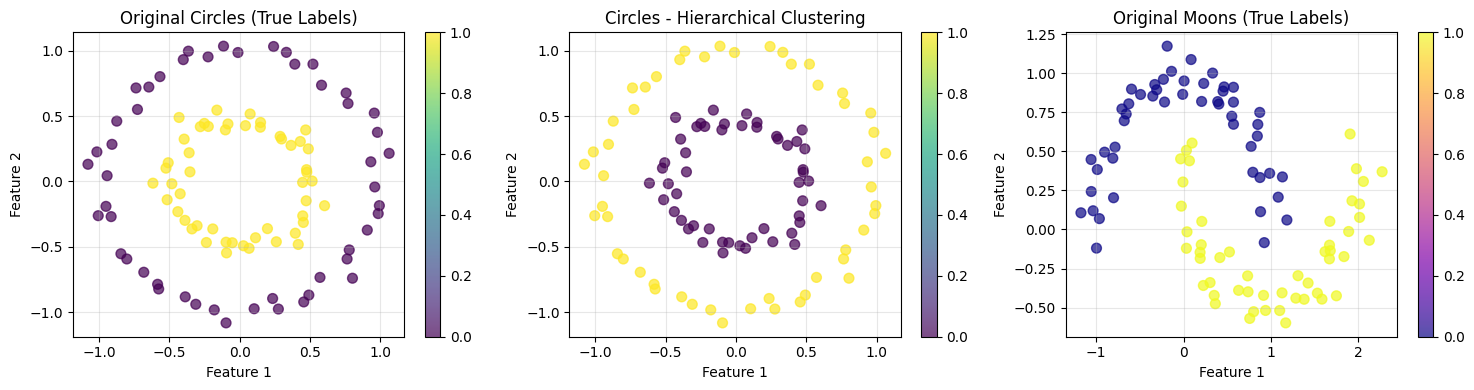

Running hierarchical clustering on moons...

=== Dendrogram Analysis ===
Generating smaller datasets for dendrogram visualization...


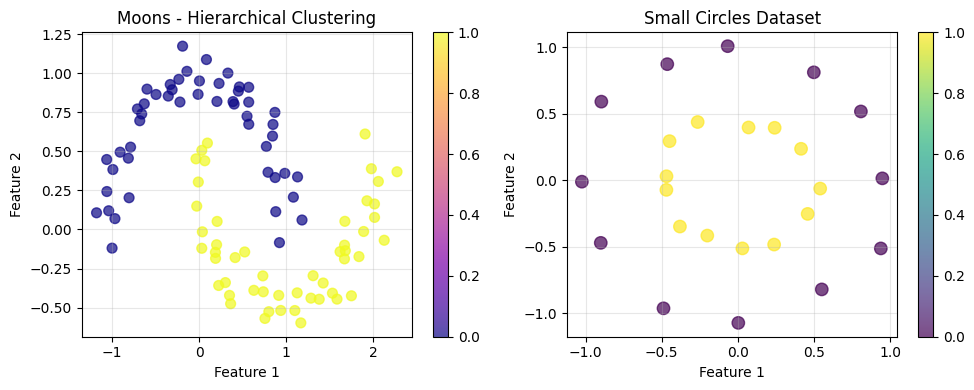

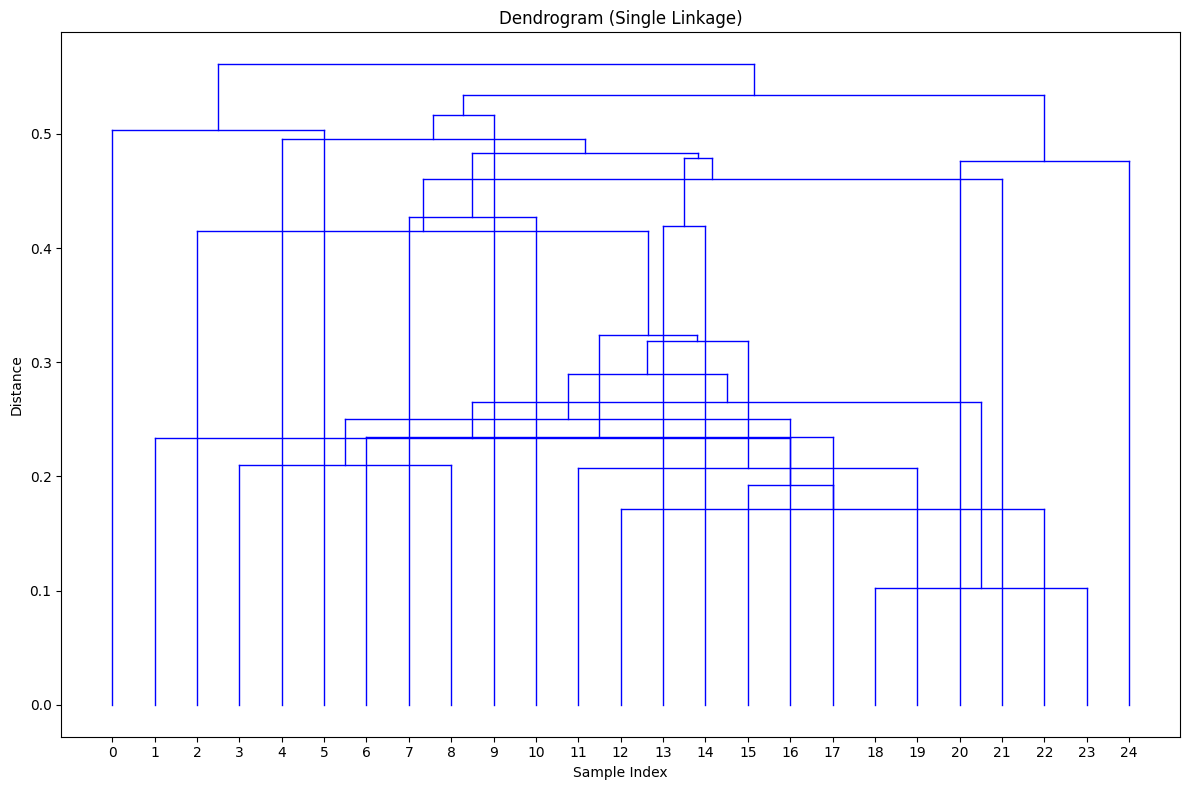

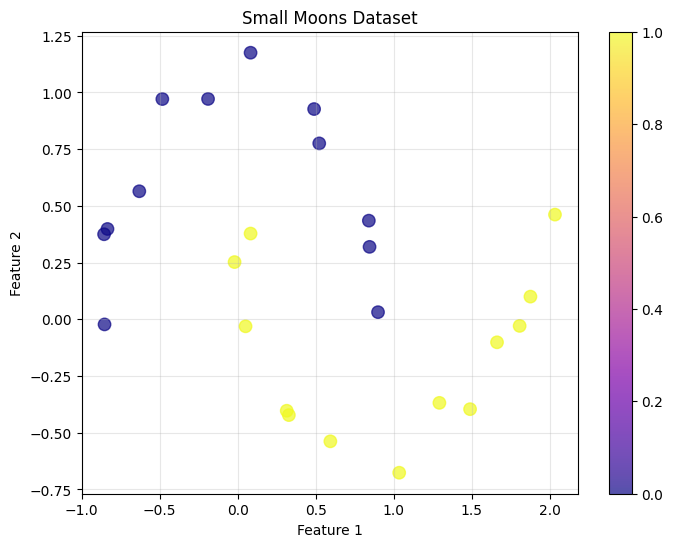

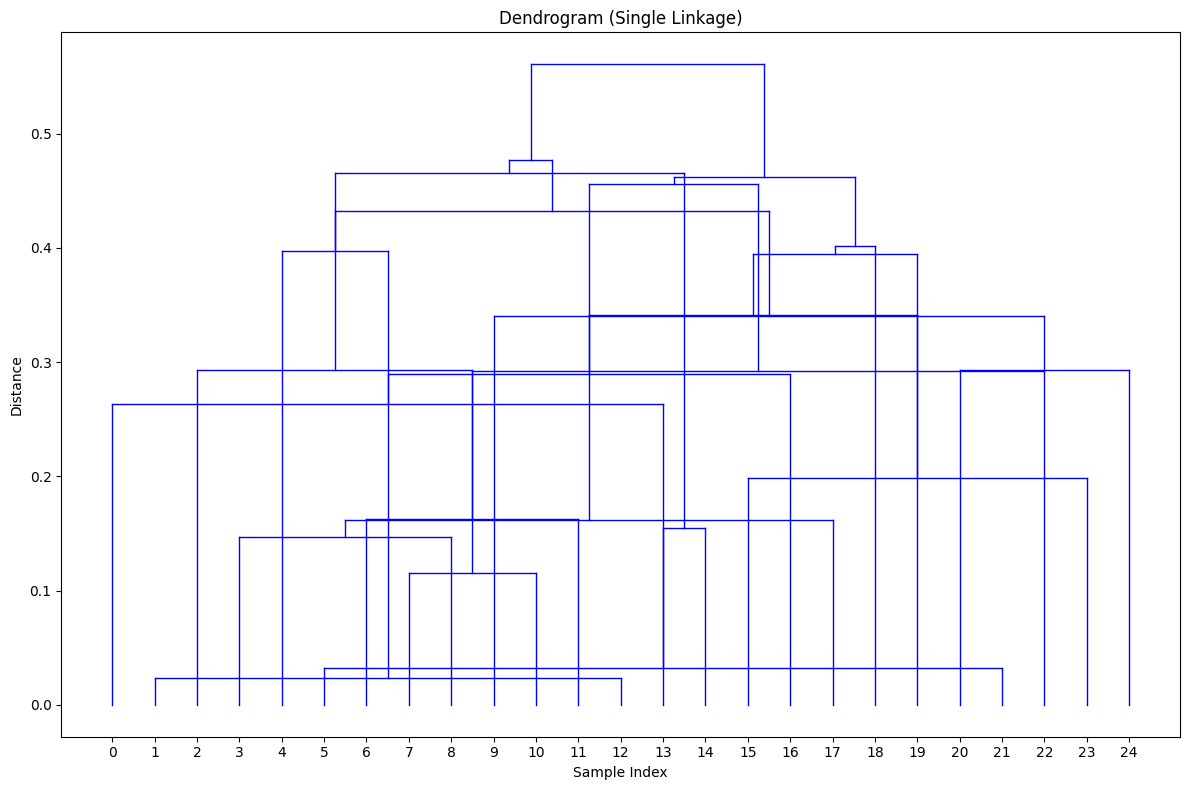


=== Performance Analysis ===
Circles Dataset:
  True labels distribution: [50 50]
  Predicted labels distribution: [50 50]
  Best clustering accuracy: 1.000
  Davies-Bouldin Index: 173.840

Moons Dataset:
  True labels distribution: [50 50]
  Predicted labels distribution: [50 50]
  Best clustering accuracy: 1.000
  Davies-Bouldin Index: 1.190

=== Comparison with Well-Separated Blobs ===
Blobs Dataset (4 clusters):
  True labels distribution: [25 25 25 25]
  Predicted labels distribution: [25 25 25 25]
  Best clustering accuracy: 0.250
  Davies-Bouldin Index: 0.229


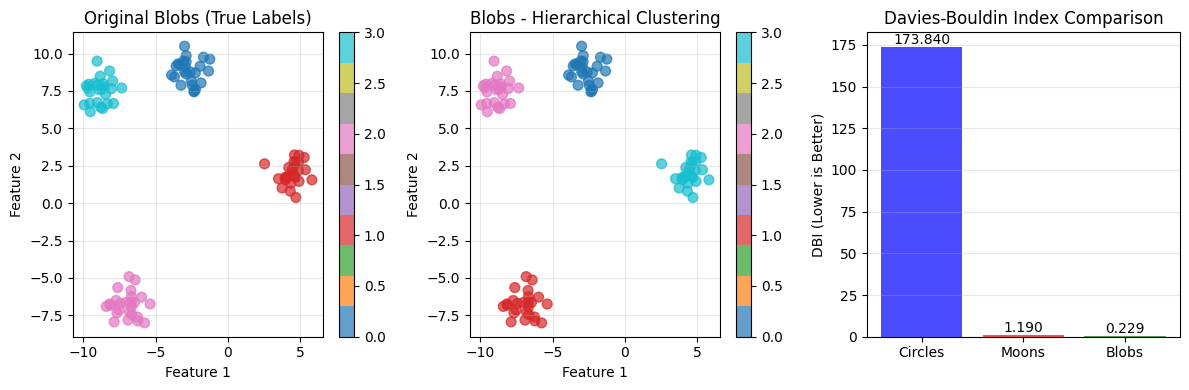


=== Summary ===
Hierarchical clustering with single linkage performance:
Dataset        | Accuracy | DBI Score
---------------|----------|----------
Circles        | 1.000    | 173.840
Moons          | 1.000    | 1.190
Blobs          | 0.250    | 0.229

Key Insights:
- Lower DBI indicates better clustering (more compact and well-separated clusters)
- Single linkage performs best on convex, well-separated clusters (blobs)
- Non-convex shapes (circles, moons) are challenging for distance-based methods
- Consider spectral clustering, DBSCAN, or complete/average linkage for complex shapes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.metrics import davies_bouldin_score

# -----------------------------
# Step 1: Euclidean distance
# -----------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# -----------------------------
# Step 2: Distance matrix (single linkage)
# -----------------------------
def compute_distance_matrix(clusters, data):
    """Compute distance matrix between clusters using their indices"""
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)

    for i in range(n):
        for j in range(i + 1, n):
            # Find minimum distance between any two points in different clusters
            min_dist = float('inf')
            for idx1 in clusters[i]:
                for idx2 in clusters[j]:
                    dist = euclidean_distance(data[idx1], data[idx2])
                    min_dist = min(min_dist, dist)

            dist_matrix[i, j] = min_dist
            dist_matrix[j, i] = min_dist

    return dist_matrix

# -----------------------------
# Step 3: Agglomerative clustering with merge history
# -----------------------------
def agglomerative_clustering(data):
    n_samples = len(data)
    # Each cluster initially contains indices of points, not the points themselves
    clusters = [[i] for i in range(n_samples)]
    cluster_ids = list(range(n_samples))
    next_id = n_samples
    merge_history = []

    while len(clusters) > 1:
        # Compute distance matrix using point indices
        dist_matrix = compute_distance_matrix(clusters, data)

        # Find the pair of clusters with minimum distance
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
        dist = dist_matrix[i, j]

        # Record the merge
        merge_history.append([cluster_ids[i], cluster_ids[j], dist])

        # Merge clusters (combine the point indices)
        new_cluster = clusters[i] + clusters[j]

        # Remove old clusters (remove higher index first to avoid index shift issues)
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))
        cluster_ids.pop(max(i, j))
        cluster_ids.pop(min(i, j))

        # Add new merged cluster
        clusters.append(new_cluster)
        cluster_ids.append(next_id)
        next_id += 1

    return merge_history

# -----------------------------
# Step 4: Dendrogram plotting from scratch
# -----------------------------
def plot_dendrogram(merge_history, n_samples):
    """Plot dendrogram using merge history"""
    # Initialize positions for leaf nodes (original data points)
    pos = {i: i for i in range(n_samples)}
    heights = {i: 0 for i in range(n_samples)}  # Track height of each node

    fig, ax = plt.subplots(figsize=(12, 8))

    next_id = n_samples

    for merge in merge_history:
        c1, c2, dist = merge

        # Get positions and current heights
        x1, x2 = pos[c1], pos[c2]
        h1, h2 = heights.get(c1, 0), heights.get(c2, 0)

        # Draw vertical lines from current height to merge height
        ax.plot([x1, x1], [h1, dist], 'b-', linewidth=1)
        ax.plot([x2, x2], [h2, dist], 'b-', linewidth=1)

        # Draw horizontal line connecting the two clusters
        ax.plot([x1, x2], [dist, dist], 'b-', linewidth=1)

        # Update position and height for new merged cluster
        new_pos = (x1 + x2) / 2
        pos[next_id] = new_pos
        heights[next_id] = dist

        # Clean up old positions
        if c1 in pos:
            del pos[c1]
        if c2 in pos:
            del pos[c2]
        if c1 in heights:
            del heights[c1]
        if c2 in heights:
            del heights[c2]

        next_id += 1

    ax.set_ylabel("Distance")
    ax.set_xlabel("Sample Index")
    ax.set_title("Dendrogram (Single Linkage)")

    # Set x-axis ticks to show sample indices
    if n_samples <= 50:  # Only show ticks if not too many samples
        ax.set_xticks(range(n_samples))

    plt.tight_layout()
    plt.show()

# -----------------------------
# Step 5: Assign clusters by cutting dendrogram
# -----------------------------
def assign_clusters(merge_history, n_clusters, n_samples):
    """Assign final cluster labels by cutting the dendrogram"""
    if n_clusters >= n_samples:
        return np.arange(n_samples)

    # Build cluster membership through the merge process
    # Start with each point in its own cluster
    clusters = {i: {i} for i in range(n_samples)}
    next_cluster_id = n_samples

    # Apply merges until we have the desired number of clusters
    merges_to_apply = n_samples - n_clusters

    for i, (c1, c2, dist) in enumerate(merge_history):
        if i >= merges_to_apply:
            break

        # Merge the two clusters
        merged_points = clusters[c1] | clusters[c2]
        clusters[next_cluster_id] = merged_points

        # Remove old clusters
        del clusters[c1]
        del clusters[c2]

        next_cluster_id += 1

    # Create final labels array
    labels = np.zeros(n_samples, dtype=int)
    for cluster_id, (cluster_label, point_set) in enumerate(clusters.items()):
        for point_idx in point_set:
            labels[point_idx] = cluster_id

    return labels

# -----------------------------
# Step 6: Plot clusters
# -----------------------------
def plot_clusters(data, labels, title="Clusters"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Step 7: Example with different datasets
# -----------------------------
def run_clustering_example(data, dataset_name, n_clusters=2):
    """Run hierarchical clustering on a dataset and display results"""
    print(f"\n=== {dataset_name} Dataset ===")
    print(f"Data shape: {data.shape}")

    # Hierarchical clustering
    print("Running hierarchical clustering...")
    merge_history = agglomerative_clustering(data)

    # Plot dendrogram (only for smaller datasets)
    if len(data) <= 100:
        plot_dendrogram(merge_history, n_samples=len(data))
    else:
        print("Skipping dendrogram plot (too many samples)")

    # Assign clusters by cutting dendrogram
    labels = assign_clusters(merge_history, n_clusters=n_clusters, n_samples=len(data))
    print(f"Final clusters: {np.bincount(labels)}")

    # Plot final clusters
    plot_clusters(data, labels, title=f"Hierarchical Clustering - {dataset_name}")

    return labels, merge_history

# -----------------------------
# Examples with challenging datasets
# -----------------------------
np.random.seed(42)

# Example 1: Concentric Circles
print("=== Concentric Circles Dataset ===")
data_circles, true_labels_circles = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=42)

# Plot original circles data
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
scatter = plt.scatter(data_circles[:, 0], data_circles[:, 1], c=true_labels_circles, cmap="viridis", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Original Circles (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Run hierarchical clustering on circles
print("Running hierarchical clustering on circles...")
merge_history_circles = agglomerative_clustering(data_circles)
labels_circles = assign_clusters(merge_history_circles, n_clusters=2, n_samples=len(data_circles))

plt.subplot(1, 3, 2)
scatter = plt.scatter(data_circles[:, 0], data_circles[:, 1], c=labels_circles, cmap="viridis", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Circles - Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Example 2: Two Moons
print("\n=== Two Moons Dataset ===")
data_moons, true_labels_moons = make_moons(n_samples=100, noise=0.1, random_state=42)

plt.subplot(1, 3, 3)
scatter = plt.scatter(data_moons[:, 0], data_moons[:, 1], c=true_labels_moons, cmap="plasma", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Original Moons (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Run hierarchical clustering on moons
print("Running hierarchical clustering on moons...")
merge_history_moons = agglomerative_clustering(data_moons)
labels_moons = assign_clusters(merge_history_moons, n_clusters=2, n_samples=len(data_moons))

# Plot moons clustering results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(data_moons[:, 0], data_moons[:, 1], c=labels_moons, cmap="plasma", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Moons - Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# Show dendrograms for smaller datasets
print("\n=== Dendrogram Analysis ===")
print("Generating smaller datasets for dendrogram visualization...")

# Smaller circles dataset for dendrogram
data_circles_small, true_labels_circles_small = make_circles(n_samples=25, noise=0.05, factor=0.5, random_state=42)
merge_history_circles_small = agglomerative_clustering(data_circles_small)

plt.subplot(1, 2, 2)
scatter = plt.scatter(data_circles_small[:, 0], data_circles_small[:, 1], c=true_labels_circles_small, cmap="viridis", s=80, alpha=0.7)
plt.colorbar(scatter)
plt.title("Small Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot dendrogram for circles
plot_dendrogram(merge_history_circles_small, n_samples=len(data_circles_small))

# Smaller moons dataset for dendrogram
data_moons_small, true_labels_moons_small = make_moons(n_samples=25, noise=0.1, random_state=42)
merge_history_moons_small = agglomerative_clustering(data_moons_small)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_moons_small[:, 0], data_moons_small[:, 1], c=true_labels_moons_small, cmap="plasma", s=80, alpha=0.7)
plt.colorbar(scatter)
plt.title("Small Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.show()

# Plot dendrogram for moons
plot_dendrogram(merge_history_moons_small, n_samples=len(data_moons_small))

# Performance Analysis
print("\n=== Performance Analysis ===")

def calculate_accuracy(true_labels, predicted_labels):
    """Calculate accuracy considering possible label flipping"""
    accuracy1 = np.mean(true_labels == predicted_labels)
    accuracy2 = np.mean(true_labels == (1 - predicted_labels))
    return max(accuracy1, accuracy2)

def calculate_dbi(data, labels):
    """Calculate Davies-Bouldin Index"""
    try:
        return davies_bouldin_score(data, labels)
    except ValueError as e:
        print(f"Error calculating DBI: {e}")
        return None

# Circles performance
circles_accuracy = calculate_accuracy(true_labels_circles, labels_circles)
circles_dbi = calculate_dbi(data_circles, labels_circles)

print(f"Circles Dataset:")
print(f"  True labels distribution: {np.bincount(true_labels_circles)}")
print(f"  Predicted labels distribution: {np.bincount(labels_circles)}")
print(f"  Best clustering accuracy: {circles_accuracy:.3f}")
print(f"  Davies-Bouldin Index: {circles_dbi:.3f}" if circles_dbi is not None else "  Davies-Bouldin Index: Could not calculate")

# Moons performance
moons_accuracy = calculate_accuracy(true_labels_moons, labels_moons)
moons_dbi = calculate_dbi(data_moons, labels_moons)

print(f"\nMoons Dataset:")
print(f"  True labels distribution: {np.bincount(true_labels_moons)}")
print(f"  Predicted labels distribution: {np.bincount(labels_moons)}")
print(f"  Best clustering accuracy: {moons_accuracy:.3f}")
print(f"  Davies-Bouldin Index: {moons_dbi:.3f}" if moons_dbi is not None else "  Davies-Bouldin Index: Could not calculate")

# For comparison, let's also test on a well-separated blobs dataset
print(f"\n=== Comparison with Well-Separated Blobs ===")
data_blobs, true_labels_blobs = make_blobs(n_samples=100, centers=4, cluster_std=0.8, random_state=42)
merge_history_blobs = agglomerative_clustering(data_blobs)
labels_blobs = assign_clusters(merge_history_blobs, n_clusters=4, n_samples=len(data_blobs))

blobs_accuracy = calculate_accuracy(true_labels_blobs, labels_blobs)
blobs_dbi = calculate_dbi(data_blobs, labels_blobs)

print(f"Blobs Dataset (4 clusters):")
print(f"  True labels distribution: {np.bincount(true_labels_blobs)}")
print(f"  Predicted labels distribution: {np.bincount(labels_blobs)}")
print(f"  Best clustering accuracy: {blobs_accuracy:.3f}")
print(f"  Davies-Bouldin Index: {blobs_dbi:.3f}" if blobs_dbi is not None else "  Davies-Bouldin Index: Could not calculate")

# Plot the blobs comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
scatter = plt.scatter(data_blobs[:, 0], data_blobs[:, 1], c=true_labels_blobs, cmap="tab10", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Original Blobs (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
scatter = plt.scatter(data_blobs[:, 0], data_blobs[:, 1], c=labels_blobs, cmap="tab10", s=50, alpha=0.7)
plt.colorbar(scatter)
plt.title("Blobs - Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)

# DBI Comparison Plot
plt.subplot(1, 3, 3)
datasets = ['Circles', 'Moons', 'Blobs']
dbi_values = [circles_dbi, moons_dbi, blobs_dbi]
colors = ['blue', 'red', 'green']

# Filter out None values
valid_datasets = []
valid_dbi_values = []
valid_colors = []
for i, dbi in enumerate(dbi_values):
    if dbi is not None:
        valid_datasets.append(datasets[i])
        valid_dbi_values.append(dbi)
        valid_colors.append(colors[i])

bars = plt.bar(valid_datasets, valid_dbi_values, color=valid_colors, alpha=0.7)
plt.title("Davies-Bouldin Index Comparison")
plt.ylabel("DBI (Lower is Better)")
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, valid_dbi_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n=== Summary ===")
print(f"Hierarchical clustering with single linkage performance:")
print(f"Dataset        | Accuracy | DBI Score")
print(f"---------------|----------|----------")
print(f"Circles        | {circles_accuracy:.3f}    | {circles_dbi:.3f}" if circles_dbi is not None else f"Circles        | {circles_accuracy:.3f}    | N/A")
print(f"Moons          | {moons_accuracy:.3f}    | {moons_dbi:.3f}" if moons_dbi is not None else f"Moons          | {moons_accuracy:.3f}    | N/A")
print(f"Blobs          | {blobs_accuracy:.3f}    | {blobs_dbi:.3f}" if blobs_dbi is not None else f"Blobs          | {blobs_accuracy:.3f}    | N/A")
print(f"\nKey Insights:")
print(f"- Lower DBI indicates better clustering (more compact and well-separated clusters)")
print(f"- Single linkage performs best on convex, well-separated clusters (blobs)")
print(f"- Non-convex shapes (circles, moons) are challenging for distance-based methods")
print(f"- Consider spectral clustering, DBSCAN, or complete/average linkage for complex shapes")